<a href="https://colab.research.google.com/github/dev-aprilchoi/projectManager/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_03_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B5%AC%EC%94%A8%EB%A5%BC_%EC%B0%BE%EC%95%84%EB%9D%BC_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석



---



## 3.구씨를 찾아라! EDA 분석하기

### 3-1.파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

---

### 0.[사전준비] 라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.데이터 다운로드하기

- 국가통계포털 사이트  https://kosis.kr/index/index.do
- 성씨ㆍ본관별_인구__시군구_~.csv 다운로드하기
 - ./sample_data/성씨ㆍ본관별_인구__시군구_20230510101129.csv

---

### 2.데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
파일명(성씨ㆍ본관별_인구__시군구_~.csv)에서 뒷부분 숫자는 다운로드된 날짜의 시간정보로 선생님과 다를 수 있으니 자신이 다운로드 받은 파일명을 사용하면 됩니다.

In [8]:
df = pd.read_csv('./sample_data/성씨ㆍ본관별_인구__시군구_20230829111259.csv', encoding='cp949')

df

,"성씨, 본관별",행정구역별(시군구),2015
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601
...,...,...,...
2764,기타,전라북도,3482
2765,기타,전라남도,4172
2766,기타,경상북도,4248
2767,기타,경상남도,5711


---

### 3.데이터 전처리하기 : 필요한 데이터만 추출하기

#### @컬럼이름 변경하기

In [9]:
# 현재 컬럼이름 출력하기
df.columns

Index(['성씨, 본관별', '행정구역별(시군구)', '2015'], dtype='object')

In [10]:
# 컬럼이름 변경하기
df.columns = ['성씨', '지역', '인구']
df.columns
df.head(2)

,성씨,지역,인구
0,계,전국,49705663
1,계,서울특별시,9567196


#### @고유한 성씨만 출력하기

In [11]:
# 고유한 성씨(한자포함) 출력하기
set(df['성씨']) # 집합에다가 넣어주면 고유한 값을 볼 수 있다

{'가(賈)',
 '간(簡)',
 '갈(葛)',
 '감(甘)',
 '강(姜)',
 '강(康)',
 '견(甄)',
 '경(慶)',
 '경(景)',
 '계',
 '계(桂)',
 '고(高)',
 '공(孔)',
 '곽(郭)',
 '구(丘)',
 '구(具)',
 '국(鞠)',
 '권(權)',
 '금(琴)',
 '기(奇)',
 '기타',
 '길(吉)',
 '김(金)',
 '나(羅)',
 '남(南)',
 '남궁(南宮)',
 '노(盧)',
 '노(魯)',
 '단(段)',
 '당(唐)',
 '도(都)',
 '도(陶)',
 '동(董)',
 '두(杜)',
 '라(羅)',
 '류(柳)',
 '마(馬)',
 '맹(孟)',
 '명(明)',
 '모(牟)',
 '목(睦)',
 '문(文)',
 '민(閔)',
 '박(朴)',
 '반(潘)',
 '방(房)',
 '방(方)',
 '배(裵)',
 '백(白)',
 '범(范)',
 '변(卞)',
 '변(邊)',
 '복(卜)',
 '봉(奉)',
 '부(夫)',
 '빈(賓)',
 '사(史)',
 '사공(司空)',
 '상(尙)',
 '서(徐)',
 '서문(西門)',
 '석(昔)',
 '석(石)',
 '선(宣)',
 '선우(鮮于)',
 '설(?)',
 '설(薛)',
 '성(成)',
 '소(蘇)',
 '소(邵)',
 '손(孫)',
 '송(宋)',
 '승(承)',
 '시(施)',
 '시(柴)',
 '신(愼)',
 '신(申)',
 '신(辛)',
 '심(沈)',
 '안(安)',
 '양(梁)',
 '양(楊)',
 '어(魚)',
 '엄(嚴)',
 '여(余)',
 '여(呂)',
 '연(延)',
 '염(廉)',
 '예(芮)',
 '오(吳)',
 '옥(玉)',
 '온(溫)',
 '왕(王)',
 '용(龍)',
 '우(禹)',
 '원(元)',
 '위(魏)',
 '유(兪)',
 '유(劉)',
 '유(庾)',
 '유(柳)',
 '육(陸)',
 '윤(尹)',
 '은(殷)',
 '음(陰)',
 '이(李)',
 '인(印)',
 '임(任)',
 '임(林)',
 '장(張)',
 '장(章)'

In [12]:
# 고유한 성씨(한자포함) 총개수 출력하기
len(set(df['성씨']))


155

In [13]:
# 고유한 한글 성씨 총개수 출력하기
print(f'한글 성씨 개수:{len(familyname)}')

# 한글 성씨만 출력하기 -> '가(賈)'--> 가  만 추출하기
familyname = set(name.split('(')[0] for name in set(df['성씨']) )
# hanzi = set(name.split('(')[1].split(')') for name in set(df['성씨']) ) # 한자는 어떻게 축출하지?

print(f'한글 성씨 목록: {familyname}')

NameError: ignored

---------------------

#### @[성씨]가  '구'인 데이터 추출하기

In [14]:
# [성씨] 열에서 '구'가 포함된 데이터 출력하기
# df[df['성씨'].str.contains('구')]
df.query("성씨.str.contains('구')") # 위아래 방법 결과 동일

# [성씨] 열에서 '구'가 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
# df_goo = df[df['성씨'].str.contains('구') & (df['지역'] !='전국')]
df_goo = df.query("성씨.str.contains('구') & (지역 != '전국')")
df_goo

,성씨,지역,인구
248,구(丘),서울특별시,3855
249,구(丘),부산광역시,162
250,구(丘),대구광역시,126
251,구(丘),인천광역시,974
252,구(丘),광주광역시,60
253,구(丘),대전광역시,1175
254,구(丘),울산광역시,110
255,구(丘),세종특별자치시,106
256,구(丘),경기도,4781
257,구(丘),강원도,217


**### [실습문제] 자신의 성씨 데이터 출력하기**


In [15]:
# df_choi = df[df['성씨'].str.contains('최')]
df_choi = df.query("성씨.str.contains('최') & (지역 != '전국')")
df_choi

,성씨,지역,인구
2376,최(催),서울특별시,777
2377,최(催),부산광역시,448
2378,최(催),대구광역시,244
2379,최(催),인천광역시,455
2380,최(催),광주광역시,208
2381,최(催),대전광역시,131
2382,최(催),울산광역시,176
2383,최(催),세종특별자치시,34
2384,최(催),경기도,1611
2385,최(催),강원도,303


#### @데이터 그룹핑: ‘구’씨 성을 가진 데이터를 [지역]별로 [인구] 합계 출력하기

In [16]:
# 1.'구'씨 데이터를 [지역]별 합계 구하기
# df_goo_group = df_goo.groupby('지역').sum()
df_goo_group = df_goo.groupby('지역').sum(numeric_only=False)
df_goo_group


# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_goo_group = df_goo_group.sort_values(by = '인구', ascending = False) # 오름차순 = False -> 내림차순
df_goo_group

,성씨,인구
지역,,
경기도,구(丘)구(具),47572
서울특별시,구(丘)구(具),38857
경상남도,구(丘)구(具),20367
부산광역시,구(丘)구(具),17871
대구광역시,구(丘)구(具),15313
인천광역시,구(丘)구(具),12028
충청남도,구(丘)구(具),10061
경상북도,구(丘)구(具),10000
대전광역시,구(丘)구(具),6295


**### [실습문제] 자신의 한글 성씨 데이터를 [지역]별로 [인구] 합계 출력하기**

In [17]:
# 자신의 한글 성씨 데이터를 지역별 합계 데이터를 '인구' 크기순으로 정렬하기

# 1.'최'씨 데이터를 [지역]별 합계 구하기
# df_choi_group = df_choi.groupby('지역').sum()
df_choi_group = df_choi.groupby('지역').sum(numeric_only=False)
df_choi_group


# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_choi_group = df_choi_group.sort_values(by = '인구', ascending = False) # 오름차순 = False -> 내림차순
df_choi_group


,성씨,인구
지역,,
경기도,최(催)최(崔),576631
서울특별시,최(催)최(崔),448374
부산광역시,최(催)최(崔),153007
경상남도,최(催)최(崔),138117
인천광역시,최(催)최(崔),137358
경상북도,최(催)최(崔),127682
대구광역시,최(催)최(崔),109895
전라북도,최(催)최(崔),98757
충청남도,최(催)최(崔),97493


---------------------------

### 4.데이터 시각화하기 : 데이터 그래프로 나타내기
- 색상 참고 :  https://matplotlib.org/stable/gallery/color/named_colors.html

#### @막대 그래프로 시각화하기

In [18]:
df_goo_group.columns

Index(['성씨', '인구'], dtype='object')

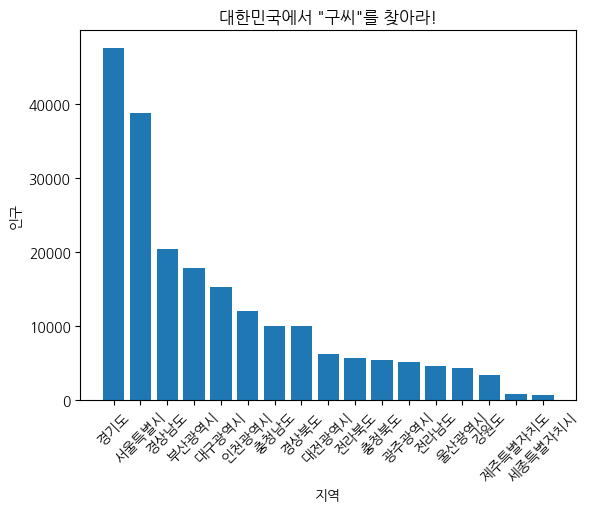

In [21]:
import matplotlib.pyplot as plt


# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rc('font', family='NanumGothic')       # (코랩)한글 폰트


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index      # 지역
y = df_goo_group['인구']    # 인구수

# 2.그래프 그리기
plt.bar(x, y)

# 3. 그래프 꾸미기
plt.title('대한민국에서 "구씨"를 찾아라!') # 그래프 제목
plt.xlabel('지역')                    # x축 이름
plt.ylabel('인구')                  # y축 이름
plt.xticks(rotation = 45)             # X축 레이블 회전
plt.show()                            # 그래프 출력하기

### [실습문제]  (코랩) 그래프에서 한글이 깨져서 보입니다. 한글이 나타나도록 만들어보세요.

In [22]:
# 1. (코랩) 한글 폰트 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 코랩에서 위 코드를 실행시킨 후  반드시 코랩(Colab)의 런타임을 재시작 합니다.

# 3. 런타입 후에는 앞에서 실행한 셀을 다시 실행해야한다.
#    (메모리에 있던 정보가 재실행하면 없어졌기때문에)

# 4. 한글폰트 지정하기
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

#### @그래프 꾸미기

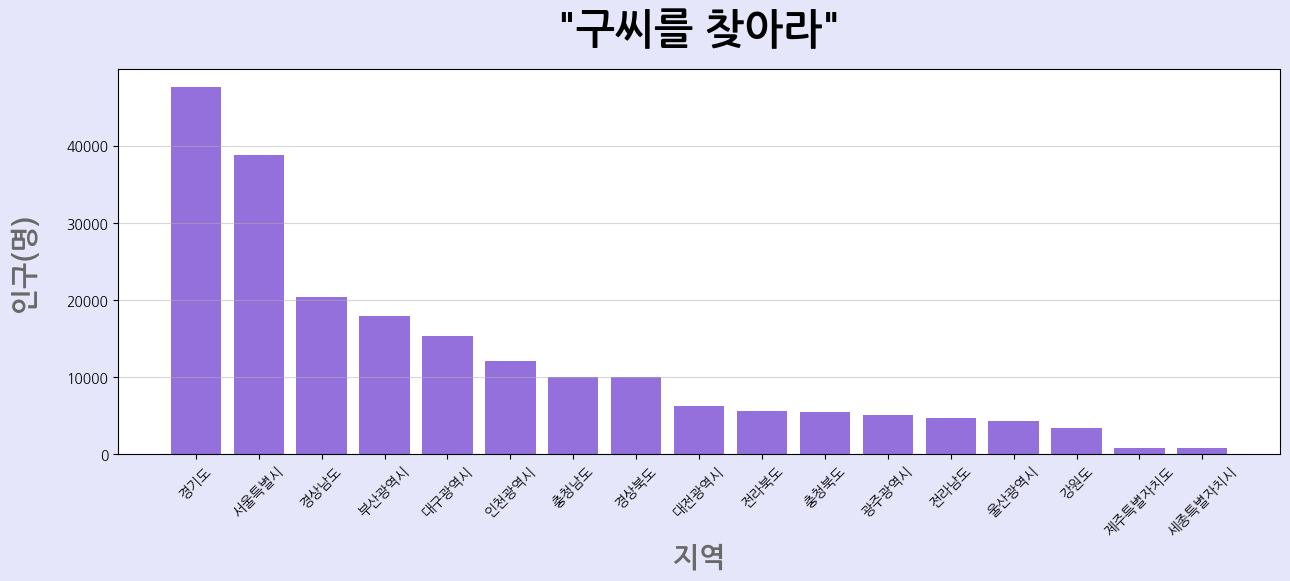

In [23]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index      # 지역
y = df_goo_group['인구']    # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')  # 막대 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @선 그래프로 시각화하기

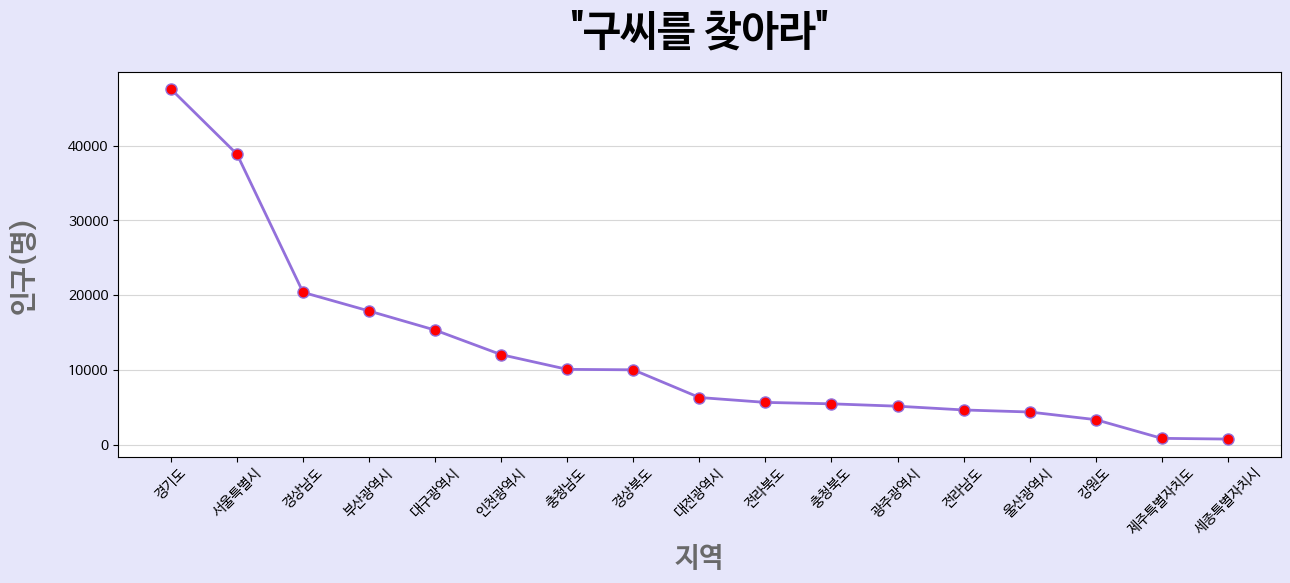

In [25]:
import matplotlib.pyplot as plt

# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index      # 지역
y = df_goo_group['인구']    # 인구수

# 2.그래프 그리기 (선그래프 그리기)
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.plot(x, y, color='mediumpurple', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red')

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @혼합 그래프

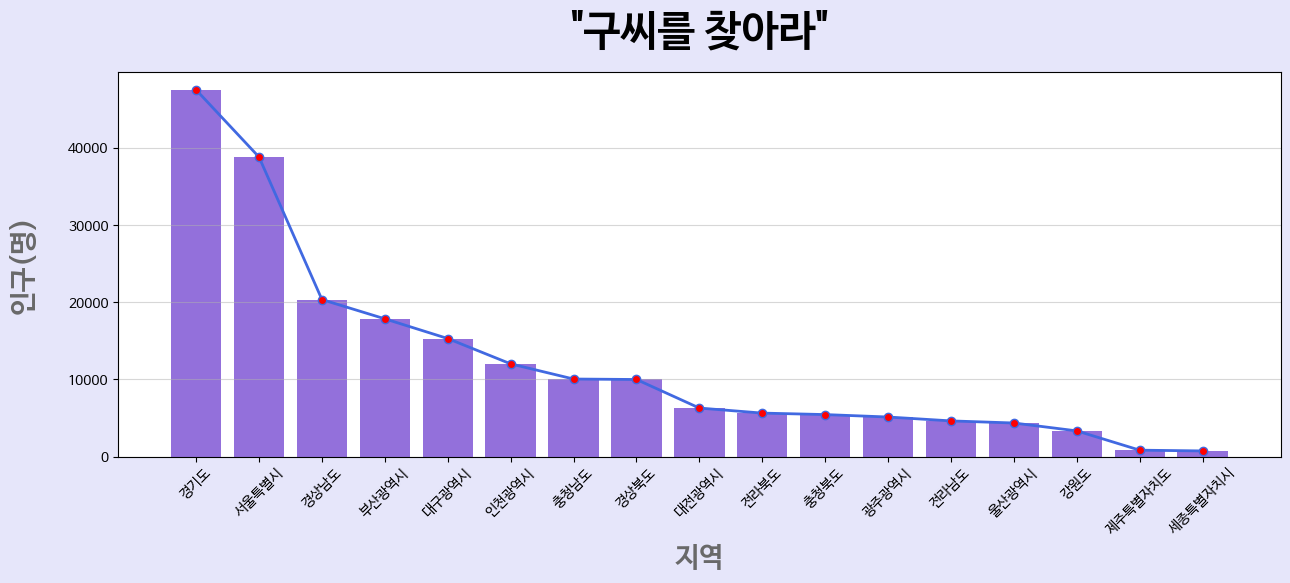

In [27]:
import matplotlib.pyplot as plt


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index      # 지역
y = df_goo_group['인구']    # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')          # 막대 그래프
plt.plot(x, y, color='royalblue', marker='o',  # 선 그래프
         linewidth=2, markerfacecolor='red')

# 3.그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                 # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)  # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

### 5. 데이터 저장하기 : 데이터 파일로 저장하기

In [ ]:
# 파일명 지정하여 저장하기
file = './sample_data/family_name_goo.csv'  # 파일명
df_goo_group.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기

-----------------------------------------

**### [실습문제] 워드클라우드로 시각화하기**

In [ ]:
# 라이브러리 설치하기
!pip install wordcloud

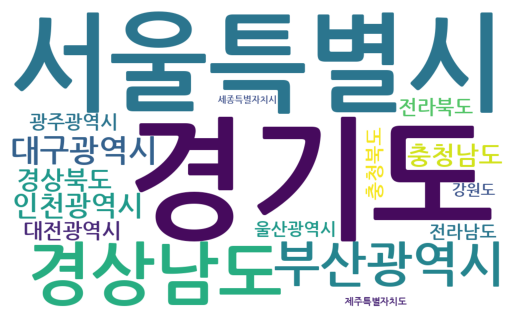

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_goo_group.index     # 지역
counts = df_goo_group['인구']  # 인구수
data = dict(zip(names, counts)) # 워드클라우드는 딕셔너리 형태로 만들기
# print(data)

# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600,
               background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('./sample_data/구씨_워드클라우드.png')



---



### **[[미션]] **
자신의 성씨 데이터 지역별로 그룹핑해서 그래프 그리고 데이터 파일을 저장하기 나타내기

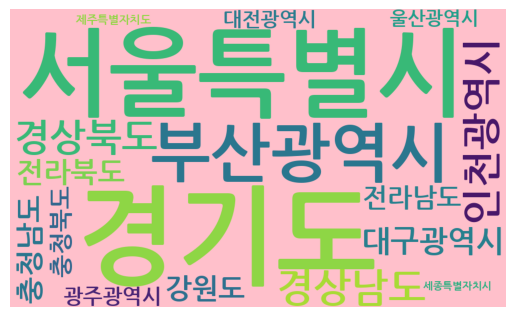

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_choi_group.index     # 지역
counts = df_choi_group['인구']  # 인구수
data = dict(zip(names, counts)) # 워드클라우드는 딕셔너리 형태로 만들기
# print(data)

# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600,
               background_color="pink", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('./sample_data/최씨_워드클라우드.png')




----------------------------------

THE END